In [1]:
import os
import json
import pandas as pd
if os.getcwd() != '/home/jupyter/crisp':
    os.chdir("..")
%pwd
from nasa_mice.functions import *
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_paths = [f for f in os.listdir('results/m_h_blends') if '.' not in f]

In [3]:
baseline = 'humans_125_mice_0_seed_42'

In [4]:
set1_cases=['humans_125_mice_125_seed_42',
'humans_125_mice_100_seed_42',
'humans_125_mice_75_seed_42',
'humans_125_mice_50_seed_42',
'humans_125_mice_25_seed_42',
'humans_125_mice_0_seed_42']

In [5]:
set2_cases=['humans_125_mice_0_seed_42',
            'humans_100_mice_25_seed_42',
'humans_75_mice_50_seed_42',
'humans_62_mice_62_seed_42',
'humans_50_mice_75_seed_42',
'humans_25_mice_100_seed_42',
'humans_0_mice_125_seed_42']

In [6]:
baseline = 'humans_125_mice_0_seed_42'
with open('results/m_h_blends/'+baseline+'/results_for_bucket.json') as json_file:
    base = json.load(json_file)

In [7]:
metrics = ['top_10_overlap_percent',
'top_20_overlap_percent',
'top_50_overlap_percent',
'ranked_bias_overlap',
'cosine_similarity']

In [8]:
set1_results = {}
for c in tqdm(set1_cases):
    with open('results/m_h_blends/'+c+'/results_for_bucket.json') as json_file:
        case = json.load(json_file)
        set1_results[c] = data_comparisons(base, case, 0)
        
set2_results = {}
for c in tqdm(set2_cases):
    with open('results/m_h_blends/'+c+'/results_for_bucket.json') as json_file:
        case = json.load(json_file)
        set2_results[c] = data_comparisons(base, case, 0)

100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


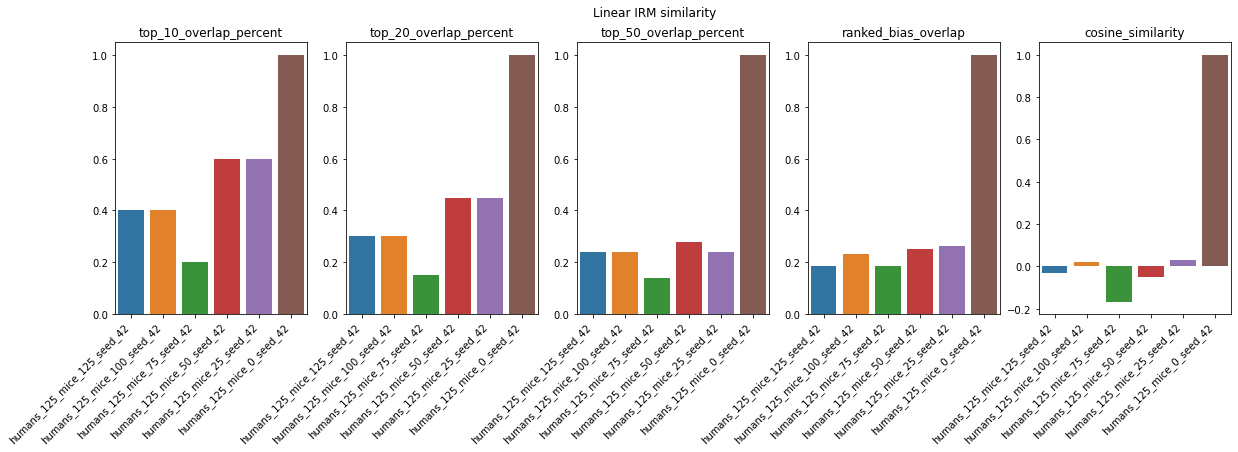

In [9]:
fig, axs = plt.subplots(1, len(metrics), figsize=(20,5))
fig.suptitle('Linear IRM similarity')
idx=0
for metric in metrics:
    vals =  [set1_results[c].metrics[metric] for c in set1_cases]
    chart = sns.barplot(x=set1_cases, y = vals, ax = axs[idx])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set_title(metric)
    idx += 1

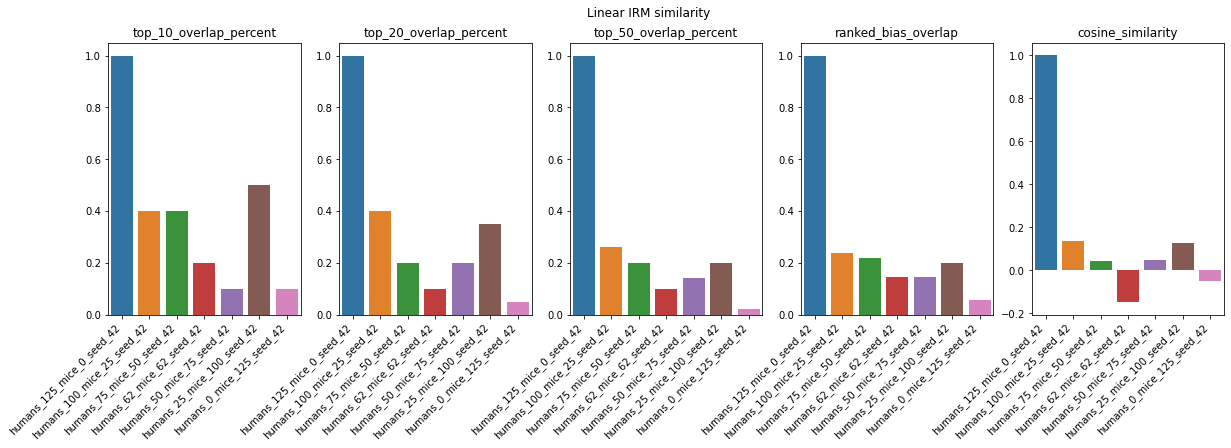

In [10]:
fig, axs = plt.subplots(1, len(metrics), figsize=(20,5))
fig.suptitle('Linear IRM similarity')
idx=0
for metric in metrics:
    vals =  [set2_results[c].metrics[metric] for c in set2_cases]
    chart = sns.barplot(x=set2_cases, y = vals, ax = axs[idx])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set_title(metric)
    idx += 1

In [11]:
set1_results = {}
for c in tqdm(set1_cases):
    with open('results/m_h_blends/'+c+'/results_for_bucket.json') as json_file:
        case = json.load(json_file)
        set1_results[c] = data_comparisons(base, case, 1)
        
set2_results = {}
for c in tqdm(set2_cases):
    with open('results/m_h_blends/'+c+'/results_for_bucket.json') as json_file:
        case = json.load(json_file)
        set2_results[c] = data_comparisons(base, case, 1)

100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


In [12]:
set2_results[c].metrics

{'top_10_overlap_percent': 0.1,
 'top_20_overlap_percent': 0.05,
 'top_50_overlap_percent': 0.04,
 'ranked_bias_overlap': 0.09275421163234215,
 'kendall_tau': KendalltauResult(correlation=-0.030491374080735628, pvalue=0.3426220216933603),
 'cosine_similarity': -0.019583657469314897}

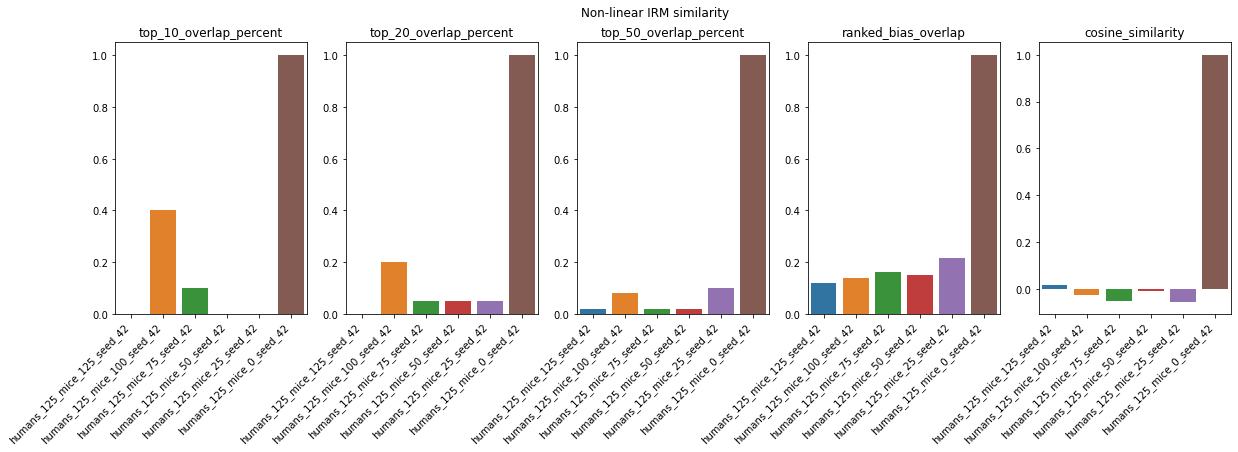

In [13]:
fig, axs = plt.subplots(1, len(metrics), figsize=(20,5))
fig.suptitle('Non-linear IRM similarity')
idx=0
for metric in metrics:
    vals =  [set1_results[c].metrics[metric] for c in set1_cases]
    chart = sns.barplot(x=set1_cases, y = vals, ax = axs[idx])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set_title(metric)
    idx += 1

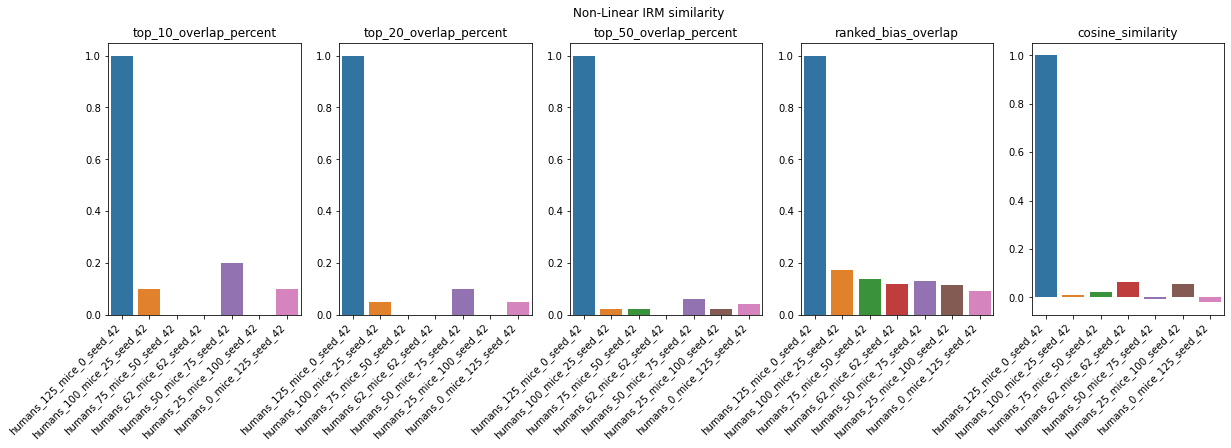

In [14]:
fig, axs = plt.subplots(1, len(metrics), figsize=(20,5))
fig.suptitle('Non-Linear IRM similarity')
idx=0
for metric in metrics:
    vals =  [set2_results[c].metrics[metric] for c in set2_cases]
    chart = sns.barplot(x=set2_cases, y = vals, ax = axs[idx])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set_title(metric)
    idx += 1

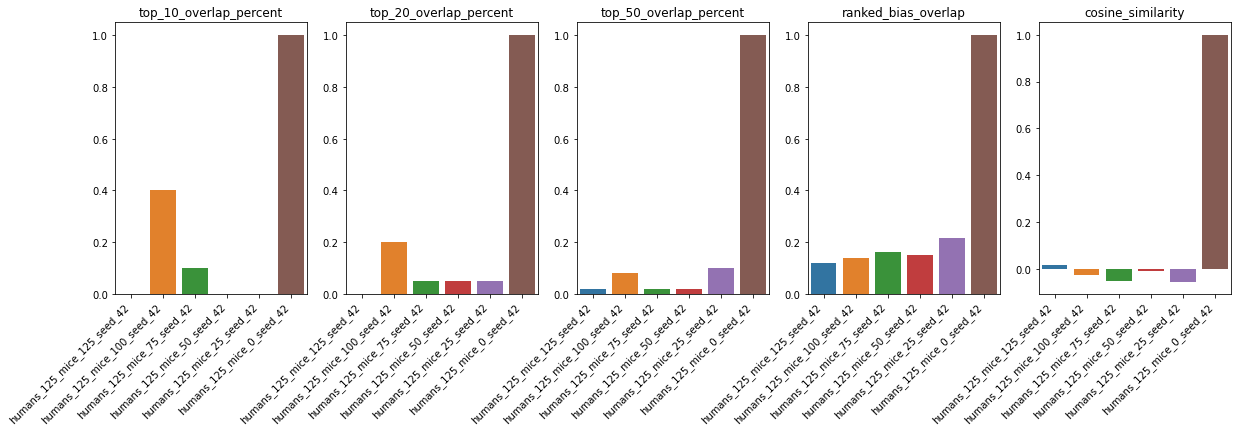

In [15]:
fig, axs = plt.subplots(1, len(metrics), figsize=(20,5))

idx=0
for metric in metrics:
    vals =  [set1_results[c].metrics[metric] for c in set1_cases]
    chart = sns.barplot(x=set1_cases, y = vals, ax = axs[idx])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set_title(metric)
    idx += 1
#     sns.barplot(results, ax=axs[idx])


[Text(0, 0, 'humans_125_mice_125_seed_42'),
 Text(1, 0, 'humans_125_mice_100_seed_42'),
 Text(2, 0, 'humans_125_mice_75_seed_42'),
 Text(3, 0, 'humans_125_mice_50_seed_42'),
 Text(4, 0, 'humans_125_mice_25_seed_42'),
 Text(5, 0, 'humans_125_mice_0_seed_42')]

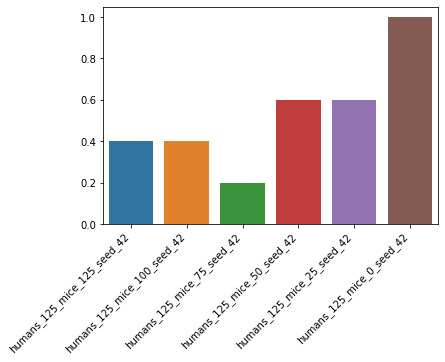

In [96]:
chart = sns.barplot(x=set1_cases, y = vals)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
fig, axs = plt.subplots(5,5, figsize=(20,15))
idx = 0
for i in set_1_results:
    for j in set_1_results[i]:
        for r in rad_dict:
            gene = rad_dict[r].T.iloc[idx]
            sns.distplot(gene, bins=np.arange(-.5, .5, 0.01), ax=axs[i,j], kde=False)
        ax.set_xlim(-0.5,0.5)
        idx += 1
plt.tight_layout()